## Credit Card Fraud Detection

In this project, we would be taking a look at a bank's customer information applying for a credit card. The variables correspond to the information a customer provides during the application. The goal is to identify customers who did fraud.
Since this is an unsupervised deep learning model, we do not have a label or a target variable.

### Import libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing
There are 15 variables, some are categorical and some continous. The SOM uses these variables as input to a neural network to map it to an output space. And in between the input space and output space, the neural network gets initialized with the vector of the columns corresponding to each customer. So, each neuron has 15 input signals.

In [35]:
data = pd.read_csv('data/credit_card_app.csv')
print(data.shape)
data.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Dataset Informaton

In [36]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB
None


### Split the dataset
y = the class column, where 1 means the application of the credit card is approved and 0 means not approved

In [37]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)

(690, 15)
(690,)


### Scale the features

We scale the features of the dataset by normalizing it

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [39]:
print(X[0,:])

[ 0.84268147  1.          0.12526316  0.40928571  0.5         0.23076923
  0.375       0.05561404  0.          0.          0.          1.          0.5
  0.05        0.01212   ]


### Self Organizing Maps from MiniSom library
Now, for each of the inputs, the output will be the neuron which is physically closest to the customer, based on euclidean distance. Then we can use a gaussian neighbourhood function to update the weights to each neuron in the neighbourhood, pulling it closer to the customer's neuron.

The above steps happen to each customer, many many times and in the process the neighbourhood distance keeps decreasing little by little, until it cannot any more. The result is that the fraud transactions would end up being the outliers.

###   MiniSom Implementation 
The MiniSom uses the following parameters:

x & y >>>>> the dimensions of the grid. It must not be too small otherwise we lose clarity. Higher the dimension, more is the accuracy

input_len >>>>> the dimentions from the input (15)

sigma >>>>> the radius of the different neighbouhood

learning_rate >>>>> This decides by how much should the weights need to be updated. Higher the value, faster the convergence but lesser the accuracy

In [40]:
from minisom import MiniSom
som = MiniSom(x=20, y =1, input_len=15, sigma=0.06, learning_rate=0.05)
som.random_weights_init(X)
som.train_random(X, num_iteration=500)

<IPython.core.display.Javascript object>


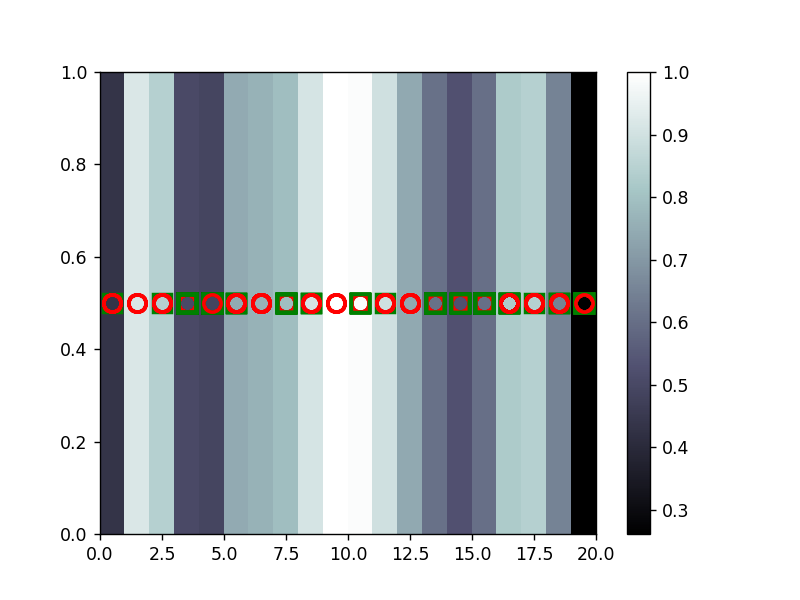

In [41]:
%matplotlib notebook
from pylab import bone, pcolor, colorbar, plot, show

#plt.figure(figsize=(12,8))
plt.bone()                         # This creates a window and pops the plot in it
plt.pcolor(som.distance_map().T)   # this is to depict different colors to depict different means of the data
plt.colorbar()
markers = ['o', 's']               # To mark the approve = 0, 1 with a circle or a square respectively
colors = ['r', 'g']                # To color a non-approval with a red color and an approval with a green
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

### Interpretation
The white/light areas are outliers (customers). The green squares are the applications that were approved and the red circles are the applications that were rejected. The green squares in the white areas denote the fraud cases of the customers whose applications were approved.

### Mapping and Concatenating the Potential Fraud cells

In [42]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(0,
              0): [array([ 0.84268147,  1.        ,  0.12526316,  0.40928571,  0.5       ,
                      0.23076923,  0.375     ,  0.05561404,  0.        ,  0.        ,
                      0.        ,  1.        ,  0.5       ,  0.05      ,  0.01212   ]), array([  9.99311253e-01,   1.00000000e+00,   2.07969925e-01,
                       1.16071429e-01,   0.00000000e+00,   7.69230769e-01,
                       8.75000000e-01,   1.78421053e-01,   0.00000000e+00,
                       1.00000000e+00,   2.98507463e-02,   1.00000000e+00,
                       5.00000000e-01,   1.84500000e-01,   1.00000000e-05]), array([  9.60693392e-01,   1.00000000e+00,   2.11729323e-01,
                       5.35714286e-02,   5.00000000e-01,   6.15384615e-01,
                       3.75000000e-01,   7.89473684e-02,   0.00000000e+00,
                       1.00000000e+00,   1.49253731e-02,   1.00000000e+00,
                       5.00000000e-01,   5.00000000

### Reverse Mapping to get back the customers with "Fraud Applications"

In [43]:
#frauds = np.concatenate((mappings[(5,7)], mappings[(6,7)]), axis=0)
frauds = mappings[(3,0)]
frauds = sc.inverse_transform(frauds)

### Potential Fraud Customer IDs

In [44]:
frauds_df= pd.DataFrame(data=frauds, columns=data.iloc[:,0:-1].columns)
frauds_df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15644446.0,1.0,33.50,1.75,2.0,14.0,8.0,4.500,1.0,1.0,4.0,1.0,2.0,253.0,858.0
1,15585892.0,1.0,41.42,5.00,2.0,11.0,8.0,5.000,1.0,1.0,6.0,1.0,2.0,470.0,1.0
2,15609356.0,1.0,20.67,1.25,1.0,8.0,8.0,1.375,1.0,1.0,3.0,1.0,2.0,140.0,211.0
3,15683168.0,1.0,29.58,4.50,2.0,9.0,4.0,7.500,1.0,1.0,2.0,1.0,2.0,330.0,1.0
4,15714087.0,1.0,32.75,1.50,2.0,13.0,8.0,5.500,1.0,1.0,3.0,1.0,2.0,0.0,1.0


### Get the customer IDs of those potential frauds

In [45]:
for i in range(len(frauds)):
    print(int(frauds[i][0]))

15644446
15585892
15609356
15683168
15714087
15588123
15618410
15672432
15583680
15617348
15682860
15730793
15572390
15575243
15690372
15621423
15570990
15638989
15690492
15694237
15566495
15663194
15746995
15706464
15637891
15627190
15764444
15618703
15568878
15638871
15607746
15677395
15631693
15687527
15671534
15605276
15583724
15586174
15717065
15721569
15646563
15605341
15652048
15580366
15649430
15674750
15595010
15583552
15613699
15572361
15667460
15569394
15594651
